In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/f

In [ ]:
data_dir = "Lung X-Ray Image"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    classes=['Normal', 'Viral Pneumonia'],  
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    classes=['Normal', 'Viral Pneumonia'],
    class_mode='binary',
    subset='validation'
)


Found 1880 images belonging to 2 classes.
Found 470 images belonging to 2 classes.


In [10]:
model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
    
)

model.summary()


c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Learning rate
optimizer = Adam(learning_rate=0.0005)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 24s 401ms/step - accuracy: 0.9660 - loss: 0.0904 - val_accuracy: 0.9617 - val_loss: 0.0952
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 28s 479ms/step - accuracy: 0.9697 - loss: 0.0697 - val_accuracy: 0.9574 - val_loss: 0.0850
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 392ms/step - accuracy: 0.9702 - loss: 0.0758 - val_accuracy: 0.9638 - val_loss: 0.1085
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 390ms/step - accuracy: 0.9729 - loss: 0.0692 - val_accuracy: 0.9596 - val_loss: 0.0969
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 27s 465ms/step - accuracy: 0.9729 - loss: 0.0690 - val_accuracy: 0.9681 - val_loss: 0.0899


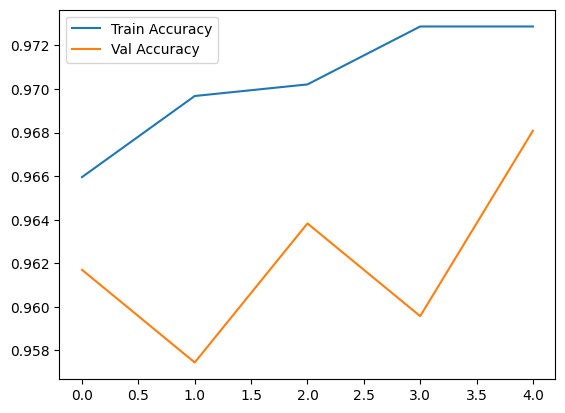

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


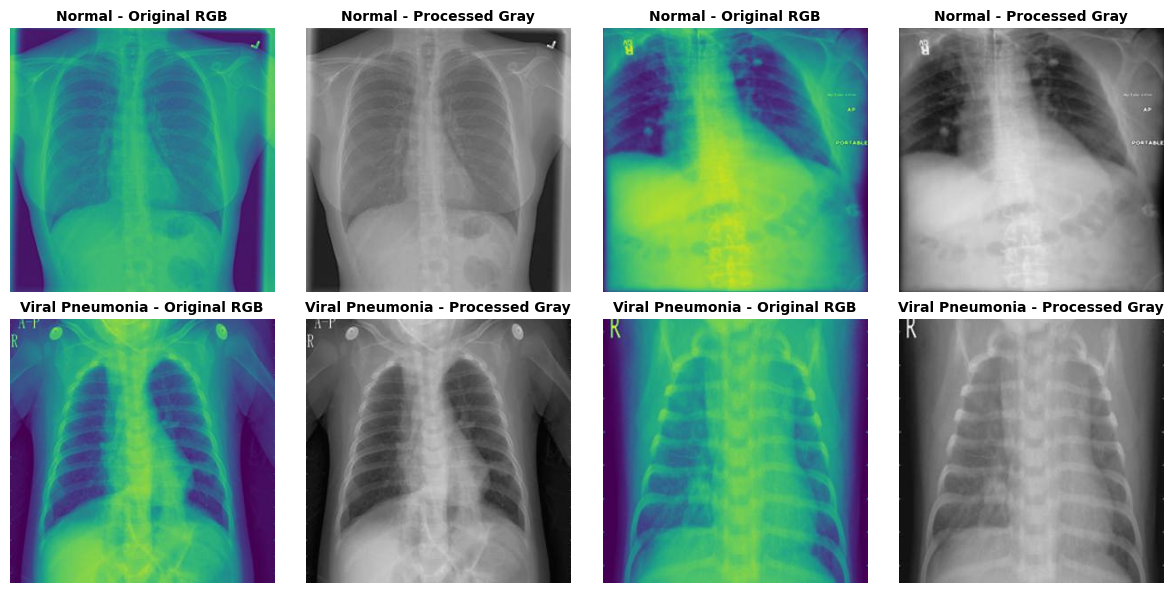

In [14]:
# ---------------- Libraries ----------------
from PIL import Image
import random
import pandas as pd
import os
import matplotlib.pyplot as plt

# ---------------- Paths ----------------
normal_path = "C:\\Users\\Incorta\\Desktop\\pneumonia_cnn\\Lung X-Ray Image\\Normal"
viral_pneumonia_path = "C:\\Users\\Incorta\\Desktop\\pneumonia_cnn\\Lung X-Ray Image\\Viral Pneumonia"

# مجلد الصور المعالجة (grayscale)
normal_gray_path = "C:\\Users\\Incorta\\Desktop\\pneumonia_cnn\\preprocessed_images\\Normal"
viral_pneumonia_gray_path = "C:\\Users\\Incorta\\Desktop\\pneumonia_cnn\\preprocessed_images\\Viral_Pneumonia"

input_dirs = {
    "Normal": normal_path,
    "Viral Pneumonia": viral_pneumonia_path
}

output_dirs = {
    "Normal": normal_gray_path,
    "Viral Pneumonia": viral_pneumonia_gray_path
}

# إنشاء مجلدات المعالجة لو مش موجودة
for dir_path in output_dirs.values():
    os.makedirs(dir_path, exist_ok=True)

# ---------------- Function to create DataFrame ----------------
def create_df(image_dir, label):
    files = os.listdir(image_dir)
    df = pd.DataFrame({
        'filename': files,
        'labels': [label]*len(files)
    })
    return df

# ---------------- دمج كل الداتا ----------------
df_csv = pd.concat([
    create_df(normal_path, "Normal"),
    create_df(viral_pneumonia_path, "Viral Pneumonia")
], ignore_index=True)

# ---------------- اختيار 2 صورة لكل class ----------------
sample_n = df_csv[df_csv['labels'] == 'Normal'].sample(2, random_state=42)
sample_vp = df_csv[df_csv['labels'] == 'Viral Pneumonia'].sample(2, random_state=42)

# ---------------- Function to preprocess image to grayscale ----------------
def preprocess_to_gray(image_path, save_path):
    img = Image.open(image_path).convert("L")  # تحويل grayscale
    img.save(save_path)
    return img

# ---------------- Preprocess all images in output_dirs ----------------
for label, input_dir in input_dirs.items():
    output_dir = output_dirs[label]
    for filename in os.listdir(input_dir):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        if not os.path.exists(output_path):
            preprocess_to_gray(input_path, output_path)

# ---------------- رسم الصور ----------------
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2 rows, 4 cols

def show_comparison(row, row_idx, col_idx, label):
    orig_path = os.path.join(input_dirs[label], row['filename'])
    pre_path = os.path.join(output_dirs[label], row['filename'])

    # Original RGB
    orig = Image.open(orig_path).convert("RGB")
    axes[row_idx, col_idx].imshow(orig)
    axes[row_idx, col_idx].axis('off')
    axes[row_idx, col_idx].set_title(f"{label} - Original RGB", fontsize=10, fontweight="bold")

    # Processed grayscale
    pre = Image.open(pre_path)
    axes[row_idx, col_idx+1].imshow(pre, cmap='gray')
    axes[row_idx, col_idx+1].axis('off')
    axes[row_idx, col_idx+1].set_title(f"{label} - Processed Gray", fontsize=10, fontweight="bold")

# رسم الصفوف
for i, (_, row) in enumerate(sample_n.iterrows()):
    show_comparison(row, 0, i*2, "Normal")
for i, (_, row) in enumerate(sample_vp.iterrows()):
    show_comparison(row, 1, i*2, "Viral Pneumonia")

plt.tight_layout()
plt.show()


In [12]:
model.save("my_model.keras")


In [13]:
#compare the hyperparmaeters batch_size (32,64), dropout(0.3 ,0.5),epoch(15,20)

In [ ]:
data_dir = "C:\\Users\\Incorta\\Desktop\\pneumonia_cnn\\Lung X-Ray Image"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=64,
    classes=['Normal', 'Viral Pneumonia'],   # مهم جداً
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=64,
    classes=['Normal', 'Viral Pneumonia'],
    class_mode='binary',
    subset='validation'
)


Found 1880 images belonging to 2 classes.
Found 470 images belonging to 2 classes.


In [15]:
model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Learning rate
optimizer = Adam(learning_rate=0.0001)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 385ms/step - accuracy: 0.9697 - loss: 0.0786 - val_accuracy: 0.9638 - val_loss: 0.0935
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 437ms/step - accuracy: 0.9697 - loss: 0.0734 - val_accuracy: 0.9617 - val_loss: 0.0996
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 384ms/step - accuracy: 0.9734 - loss: 0.0703 - val_accuracy: 0.9723 - val_loss: 0.0785
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 447ms/step - accuracy: 0.9691 - loss: 0.0773 - val_accuracy: 0.9574 - val_loss: 0.1119
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 28s 473ms/step - accuracy: 0.9787 - loss: 0.0660 - val_accuracy: 0.9553 - val_loss: 0.0958


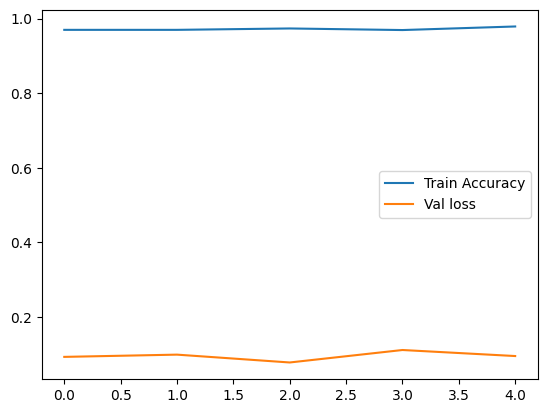

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()